<a href="https://colab.research.google.com/github/zainamri/tugas/blob/main/retailonlineADS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [50]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load dataset
df = '/content/drive/MyDrive/dataset/online_retail_II.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Membaca masing-masing sheet langsung dari GDrive
df_2009 = pd.read_excel(df, sheet_name='Year 2009-2010')
df_2010 = pd.read_excel(df, sheet_name='Year 2010-2011')

# Menggabungkan kedua sheet
df_all = pd.concat([df_2009, df_2010], ignore_index=True)

In [52]:
# Menampilkan jumlah baris dan kolom
print(df_all.shape)
df_all.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [53]:
# Menampilkan Info Data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [54]:
df_all.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


Pembersihan Data

In [55]:
print("Missing Values per Kolom:\n", df_all.isnull().sum())

Missing Values per Kolom:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [56]:
print("Jumlah data duplikat:", df_all.duplicated().sum())


Jumlah data duplikat: 34335


In [57]:
for col in df_all.columns:
    print(f"{col}: {df_all[col].nunique()} unique values")


Invoice: 53628 unique values
StockCode: 5305 unique values
Description: 5698 unique values
Quantity: 1057 unique values
InvoiceDate: 47635 unique values
Price: 2807 unique values
Customer ID: 5942 unique values
Country: 43 unique values


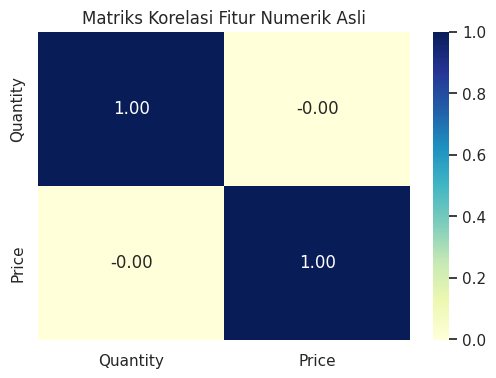

In [58]:
# Pilih kolom numerik asli (misalnya: Quantity, Price)
num_cols = ['Quantity', 'Price']

# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[num_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik Asli')
plt.show()

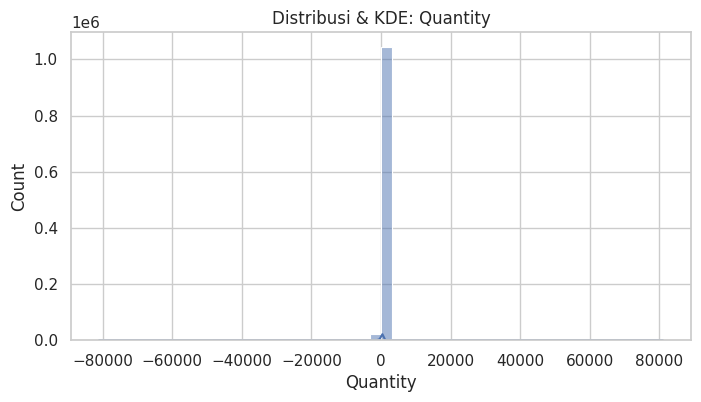

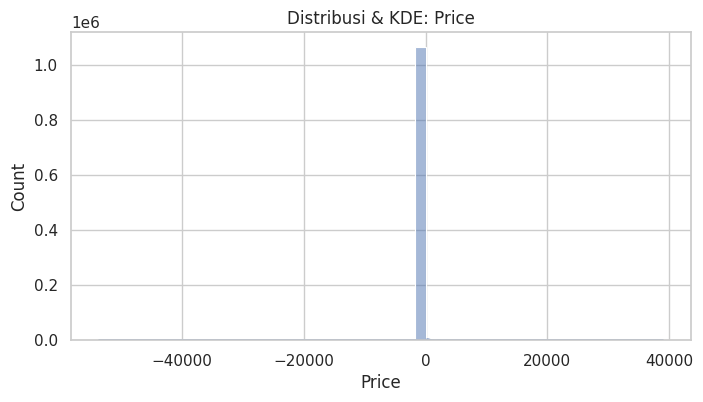

In [59]:
# Skewness menunjukkan apakah data simetris atau condong ke kiri/kanan
df_all[['Quantity', 'Price']].skew()

# Histogram
for col in ['Quantity', 'Price']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_all[col], kde=True, bins=50)
    plt.title(f'Distribusi & KDE: {col}')
    plt.show()

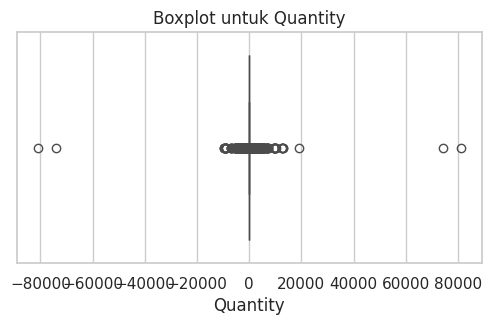

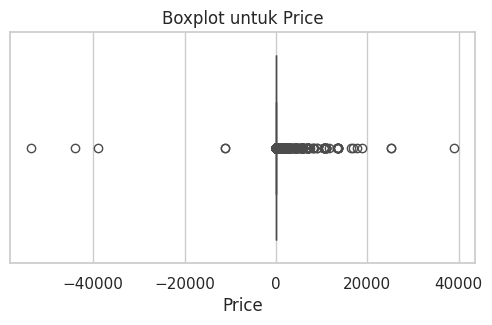

In [60]:
for col in ['Quantity', 'Price']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_all[col])
    plt.title(f'Boxplot untuk {col}')
    plt.show()

In [61]:
# Cek missing value
print("Missing Value Tiap Kolom:\n", df_all.isnull().sum())

# Buang baris tanpa Customer ID dan buat salinan aman
df_clean = df_all.dropna(subset=['Customer ID']).copy()

# Buat kolom ID dalam format string (tanpa .0)
df_clean['CustomerID_str'] = df_clean['Customer ID'].astype(int).astype(str)

# Hitung total belanja per baris
df_clean.loc[:,'TotalPrice'] = df_clean['Quantity'] * df_clean['Price']

# Menampilkan jumlah data setelah bersih
print("Jumlah data setelah dibersihkan:", df_clean.shape)

Missing Value Tiap Kolom:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
Jumlah data setelah dibersihkan: (824364, 10)


=== SKEWNESS ===
Quantity        5.082257
Price         311.221083
TotalPrice     -0.605511
dtype: float64


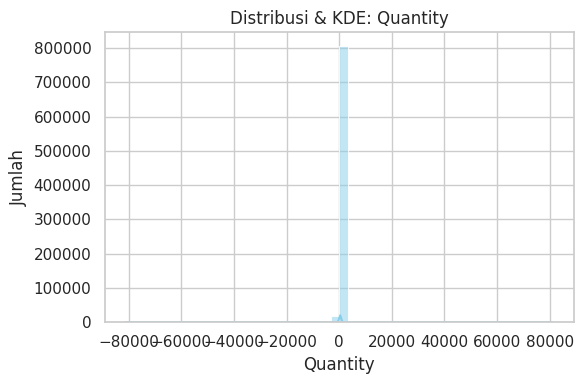

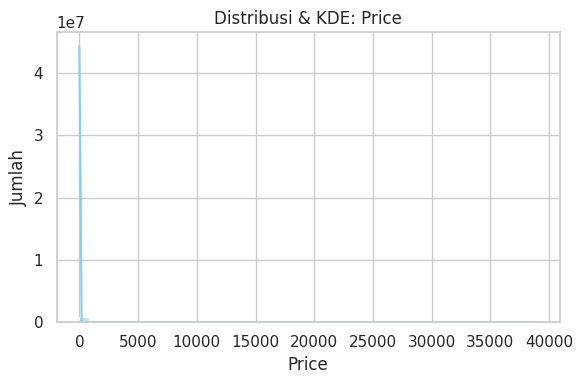

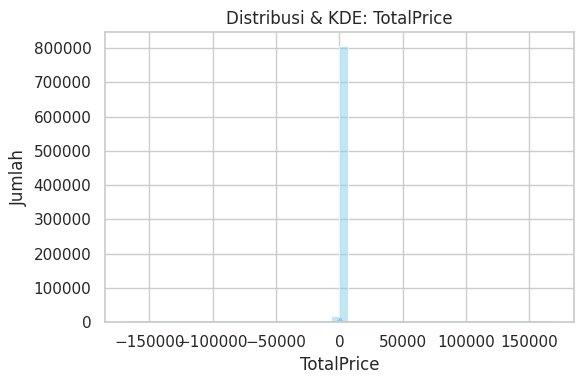

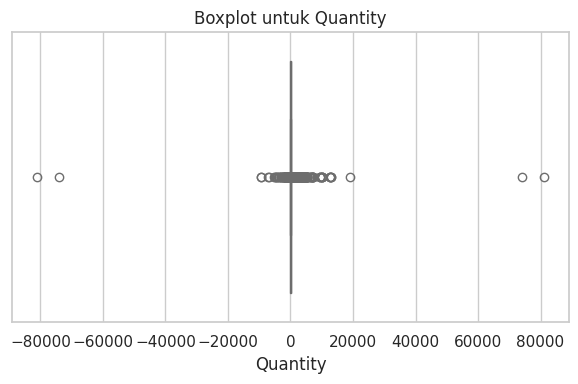

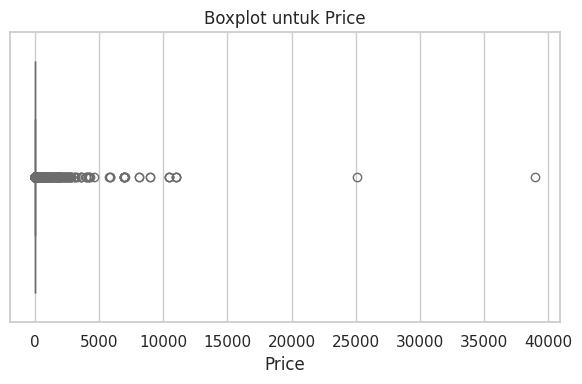

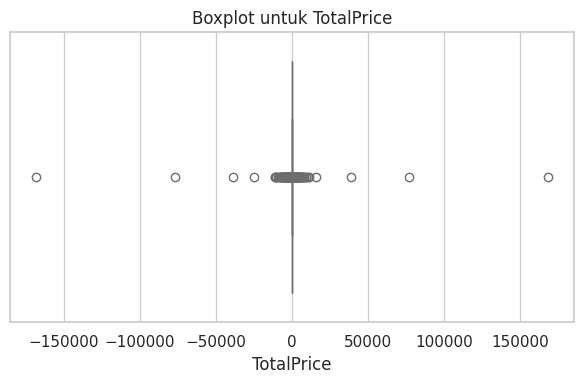

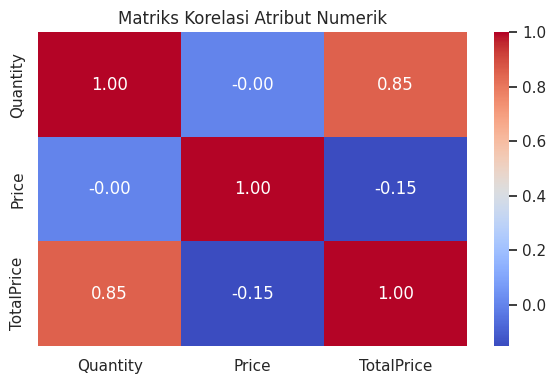

In [62]:
# Pilih kolom numerik untuk dianalisis
numeric_cols = ['Quantity', 'Price', 'TotalPrice']

# 1. Skewness (kemiringan distribusi)
print("=== SKEWNESS ===")
skewness = df_clean[numeric_cols].skew()
print(skewness)

# 2. Histogram + KDE (Distribusi)
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribusi & KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

# 3. Boxplot (Outlier detection visual)
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col], color='salmon')
    plt.title(f'Boxplot untuk {col}')
    plt.tight_layout()
    plt.show()

# 4. Korelasi antar fitur numerik
plt.figure(figsize=(6, 4))
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Atribut Numerik")
plt.tight_layout()
plt.show()

RFM

Hitung RFM

In [63]:
# Menentukan tanggal referensi (paling akhir + 1 hari)
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM
df_rfm = df_clean.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                       # Monetary

    })

df_rfm.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm = df_rfm.reset_index()
df_rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,17,-64.68
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,310,1,334.40


Statistik Deskriptif

In [64]:
print("\nStatistik Deskriptif RFM:\n")
df_rfm.describe()


Statistik Deskriptif RFM:



,Customer ID,Recency,Frequency,Monetary
count,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,202.908617,7.552339,2801.799459
std,1715.451981,211.857936,15.972262,13973.922553
min,12346.000000,1.000000,1.000000,-25111.090000
25%,13831.250000,25.000000,2.000000,325.097500
50%,15316.500000,96.000000,4.000000,843.970000
75%,16801.750000,381.000000,8.000000,2182.005000
max,18287.000000,739.000000,510.000000,598215.220000


In [65]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5942 non-null   float64
 1   Recency      5942 non-null   int64  
 2   Frequency    5942 non-null   int64  
 3   Monetary     5942 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 185.8 KB


Visualisasi RFM

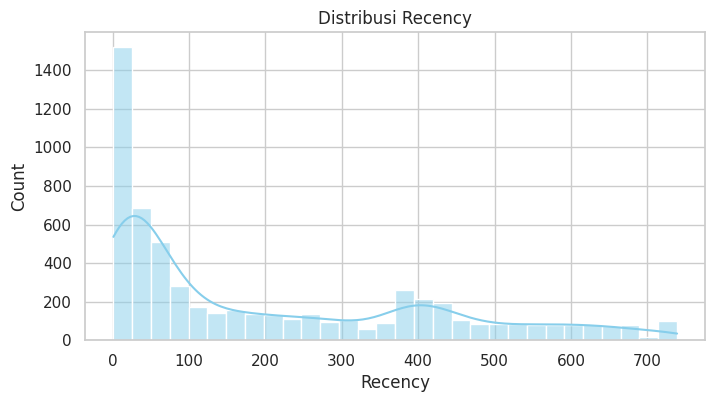

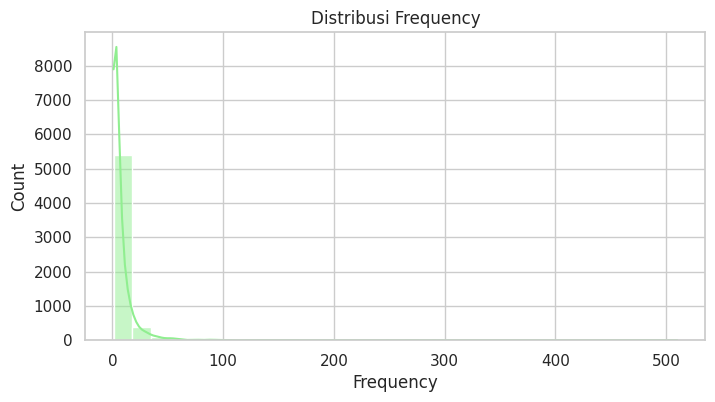

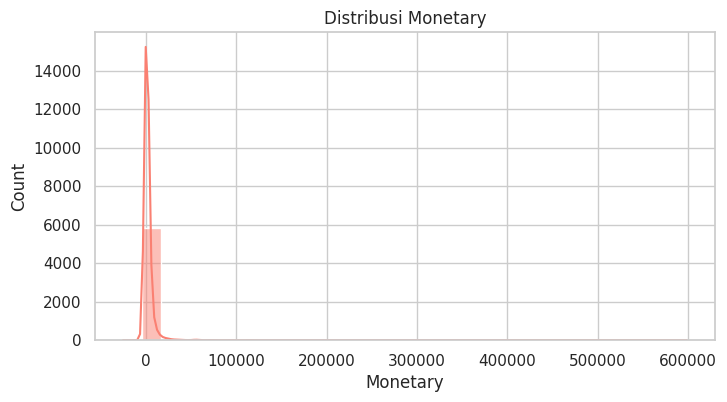

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Recency
plt.figure(figsize=(8, 4))
sns.histplot(df_rfm['Recency'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi Recency")
plt.show()

# Frequency
plt.figure(figsize=(8, 4))
sns.histplot(df_rfm['Frequency'], kde=True, bins=30, color='lightgreen')
plt.title("Distribusi Frequency")
plt.show()

# Monetary
plt.figure(figsize=(8, 4))
sns.histplot(df_rfm['Monetary'], kde=True, bins=30, color='salmon')
plt.title("Distribusi Monetary")
plt.show()

Korelasi antar RFM (Heatmap)

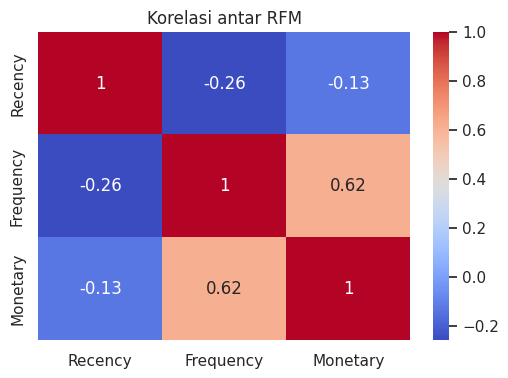

In [67]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar RFM")
plt.show()

Visualisasi Outlier

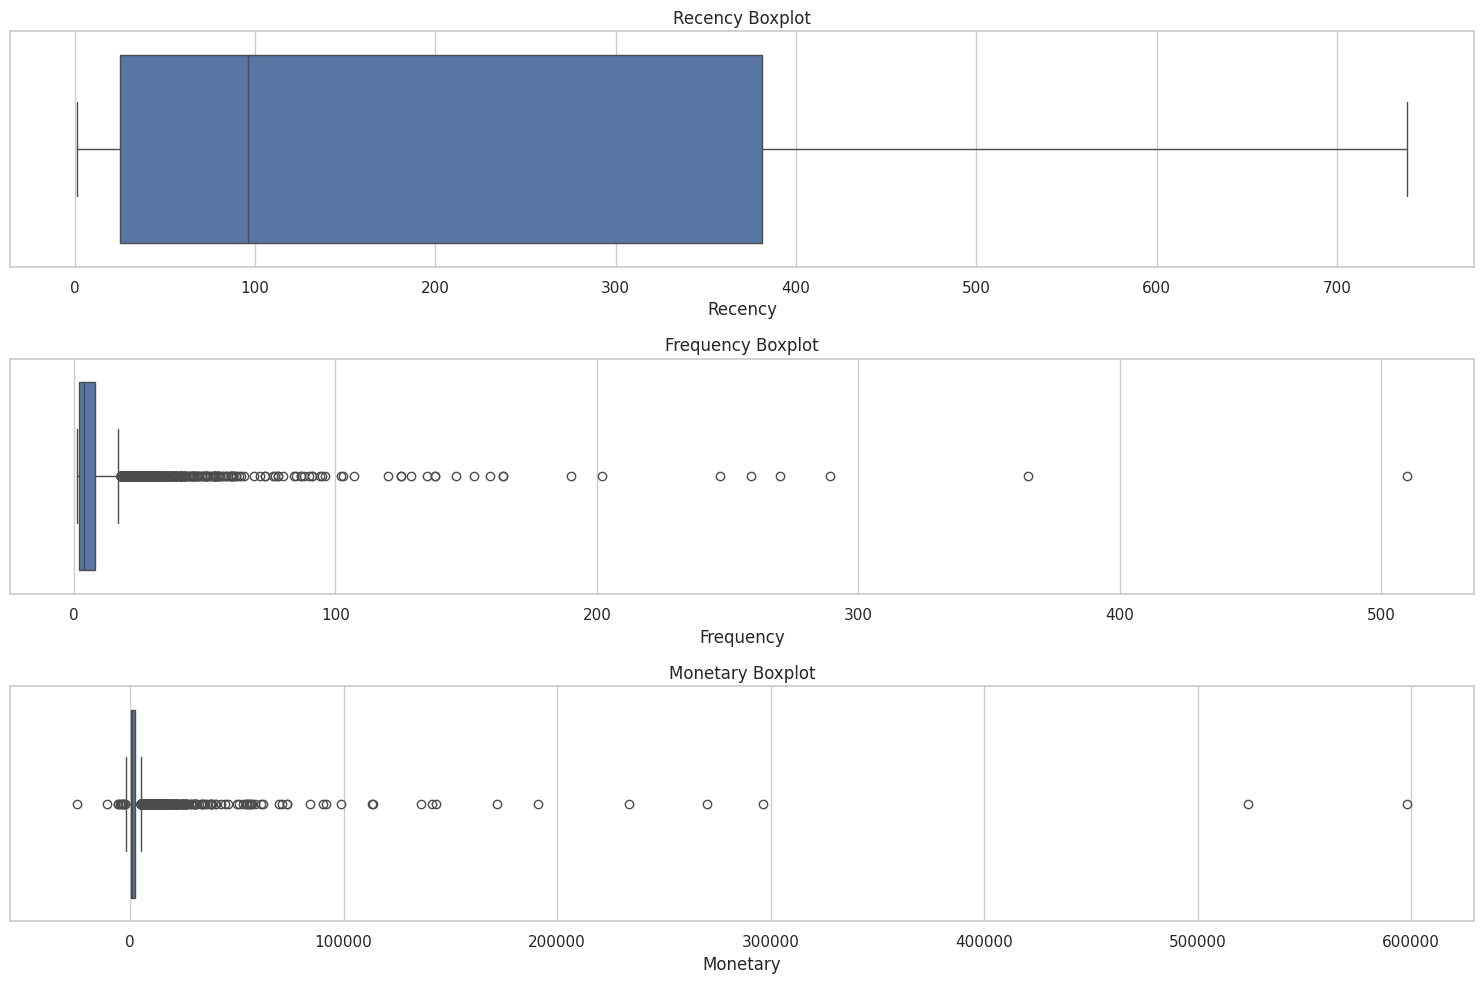

In [68]:
# Buat boxplot untuk masing-masing metrik RFM
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=df_rfm[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [69]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Terapkan ke ketiga kolom
rfm_no_outliers = df_rfm.copy()
for col in ['Recency', 'Frequency', 'Monetary']:
    rfm_no_outliers = remove_outliers_iqr(rfm_no_outliers, col)

print("Sisa data setelah buang outlier:", rfm_no_outliers.shape)


Sisa data setelah buang outlier: (4958, 4)


Clustering K-Means

In [70]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
df_rfm['Cluster'] = df_rfm['Cluster'].astype(str)


Visualisasi Cluster

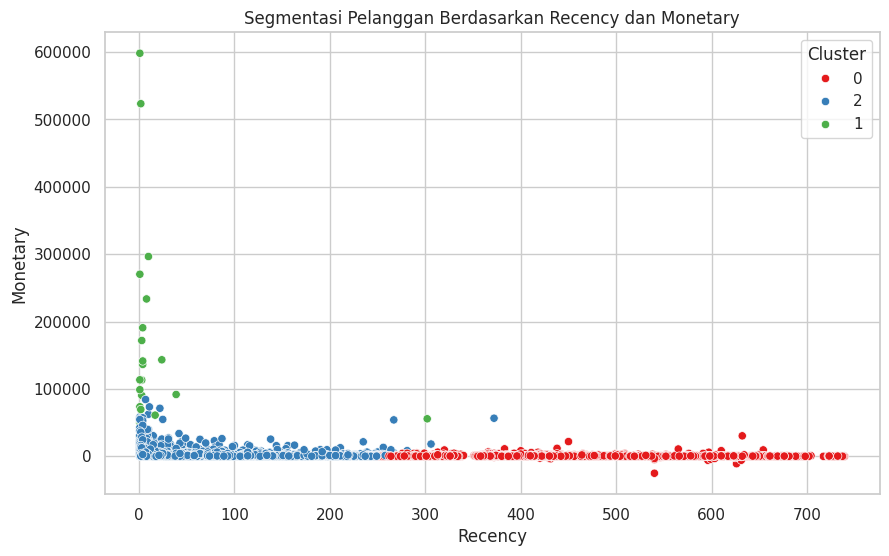

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title("Segmentasi Pelanggan Berdasarkan Recency dan Monetary")
plt.show()

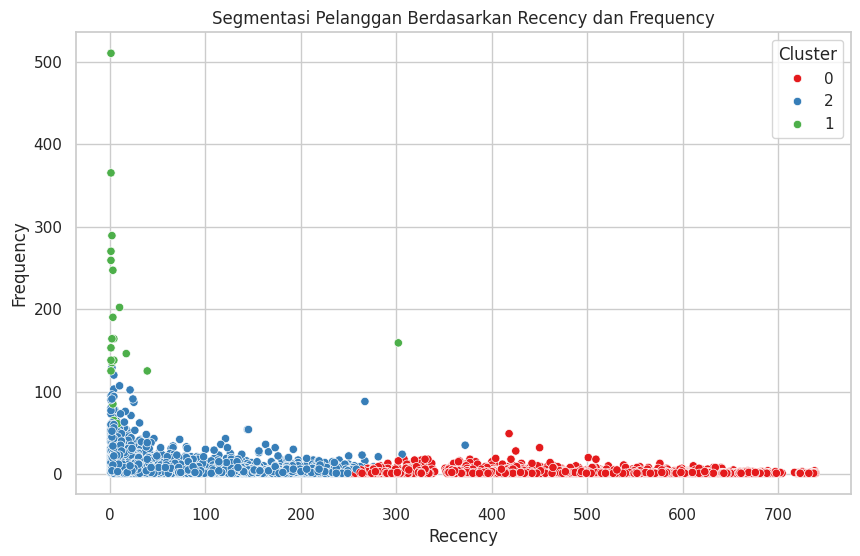

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.title("Segmentasi Pelanggan Berdasarkan Recency dan Frequency")
plt.show()

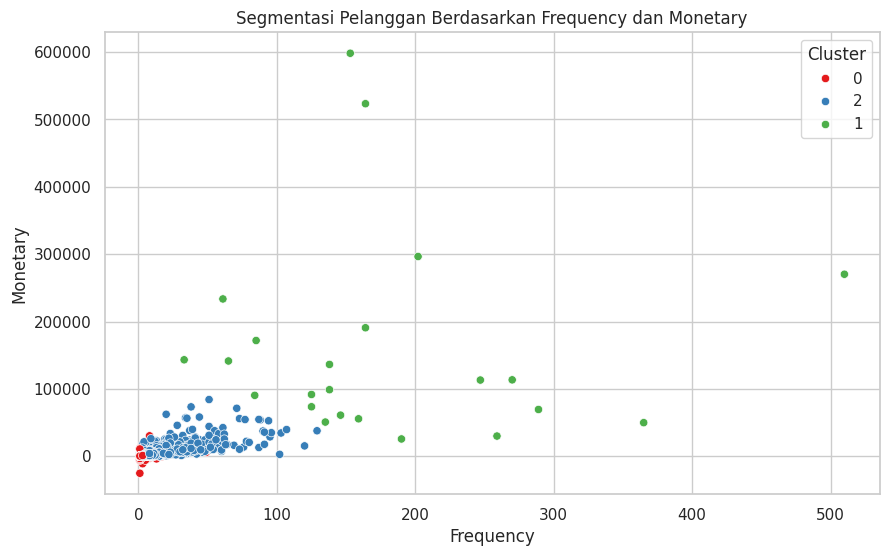

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set1')
plt.title("Segmentasi Pelanggan Berdasarkan Frequency dan Monetary")
plt.show()

In [74]:
# Ambil Customer ID dan Country dari df_clean, tapi pastikan unik (biar nggak dobel2)
df_country = df_clean[['Customer ID', 'Country']].drop_duplicates()

# Gabungkan kembali ke dataframe RFM yang sudah ada clustering-nya
rfm_with_country = df_rfm.merge(df_country, on='Customer ID', how='left')


In [75]:
# Tambah kolom Segment dulu
cluster_labels = {
    '0': 'Pasif',
    '1': 'VIP',
    '2': 'Setia'
}
df_rfm['Cluster'] = df_rfm['Cluster'].astype(str)
df_rfm['Segment'] = df_rfm['Cluster'].map(cluster_labels)

# Lihat rata-rata per cluster + jumlah anggota
cluster_summary = df_rfm.groupby(['Cluster', 'Segment']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Jumlah_Pelanggan'})

print(cluster_summary)


                    Recency   Frequency       Monetary  Jumlah_Pelanggan
Cluster Segment                                                         
0       Pasif    465.532290    2.577789     619.422829              2044
1       VIP       19.000000  178.565217  157840.553130                23
2       Setia     65.470452    9.161290    3032.737910              3875


In [76]:
# Negara dengan jumlah pelanggan VIP terbanyak
vip_per_country = rfm_with_country[rfm_with_country['Segment'] == 'VIP'].groupby('Country')['Customer ID'].count().sort_values(ascending=False)

print(vip_per_country.head(10))


KeyError: 'Segment'